In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
from tensorflow.keras.preprocessing import image
import glob
from tensorflow import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Activation,Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import layers




In [171]:

#carregar pil
path_train = "C:\\Users\\joaoe\\Desktop\\Data Science\\GTSRB - German Traffic Sign Recognition Benchmark\\archive\\Train"
files_train = glob.glob(path_train + "\\*\\*.png")



In [172]:

image_size = (32, 32)
batch_size = 64

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path_train,
    labels="inferred",
    label_mode="int",
    class_names=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42'],
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path_train,
    labels="inferred",
    label_mode="int",
    class_names=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42'],
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=image_size,
    batch_size=batch_size,
)

Found 39209 files belonging to 43 classes.
Using 31368 files for training.
Found 39209 files belonging to 43 classes.
Using 7841 files for validation.


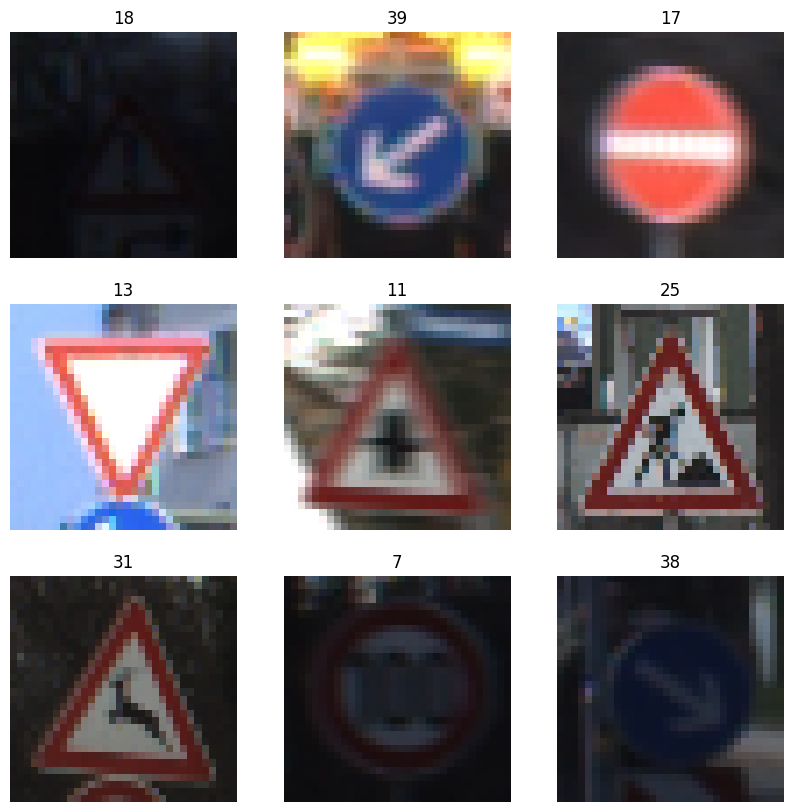

In [173]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [174]:
#train_ds = train_ds.prefetch(buffer_size=32)
#val_ds = val_ds.prefetch(buffer_size=32)

In [175]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [176]:
model = Sequential()
model.add(Conv2D(64, (5, 5), input_shape = (32, 32,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [177]:

opt = keras.optimizers.Adam(learning_rate = 0.001)

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(43))
model.add(Activation('Softmax'))

model.compile(
    optimizer=opt,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)


In [178]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_73 (Conv2D)          (None, 28, 28, 64)        4864      
                                                                 
 activation_100 (Activation)  (None, 28, 28, 64)       0         
                                                                 
 max_pooling2d_72 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 conv2d_74 (Conv2D)          (None, 10, 10, 128)       204928    
                                                                 
 activation_101 (Activation)  (None, 10, 10, 128)      0         
                                                     

In [179]:

epochs = 14

history = model.fit(
    train_ds,
    
    epochs=epochs, 
    validation_data=val_ds,
    batch_size=128, 
    callbacks=[callback],
    verbose=1 
)


Epoch 1/14
491/491 [==============================] - 50s 100ms/step - loss: 2.3476 - accuracy: 0.4574 - val_loss: 0.5557 - val_accuracy: 0.8691
Epoch 2/14
491/491 [==============================] - 48s 98ms/step - loss: 0.6775 - accuracy: 0.8143 - val_loss: 0.2010 - val_accuracy: 0.9570
Epoch 3/14
491/491 [==============================] - 49s 99ms/step - loss: 0.4269 - accuracy: 0.8855 - val_loss: 0.1641 - val_accuracy: 0.9647
Epoch 4/14
491/491 [==============================] - 49s 99ms/step - loss: 0.3641 - accuracy: 0.9011 - val_loss: 0.1052 - val_accuracy: 0.9760
Epoch 5/14
491/491 [==============================] - 54s 110ms/step - loss: 0.3060 - accuracy: 0.9200 - val_loss: 0.1125 - val_accuracy: 0.9762
Epoch 6/14
491/491 [==============================] - 51s 104ms/step - loss: 0.3233 - accuracy: 0.9172 - val_loss: 0.0811 - val_accuracy: 0.9813
Epoch 7/14
491/491 [==============================] - 49s 100ms/step - loss: 0.2844 - accuracy: 0.9268 - val_loss: 0.0893 - val_accur

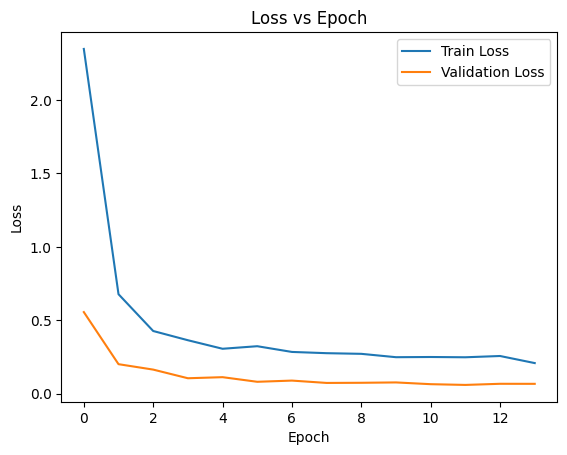

In [187]:
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.title("Loss vs Epoch")
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()  


In [194]:
path_image = "C:\\Users\\joaoe\\Desktop\\Data Science\\GTSRB - German Traffic Sign Recognition Benchmark\\archive\\Train\\4\\00004_00011_00025.png"
imagem = image.load_img(path_image, target_size=(32, 32))

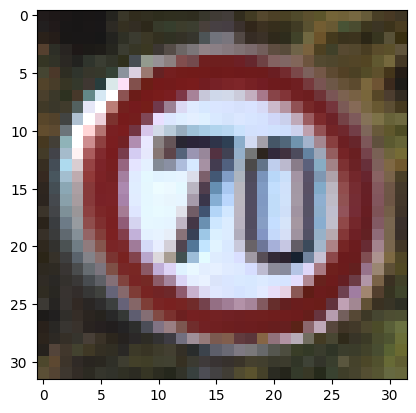

In [195]:
plt.imshow(imagem)

In [196]:


x = image.img_to_array(imagem)
x = np.expand_dims(x, axis=0)


In [197]:
imagems = np.vstack([x])
classes = model.predict(imagems, batch_size=10)
print(classes)


1/1 [==============================] - 0s 23ms/step
[[1.4671510e-25 1.8888060e-29 0.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.5967597e-36 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]]


In [198]:
np.argmax(classes)

4

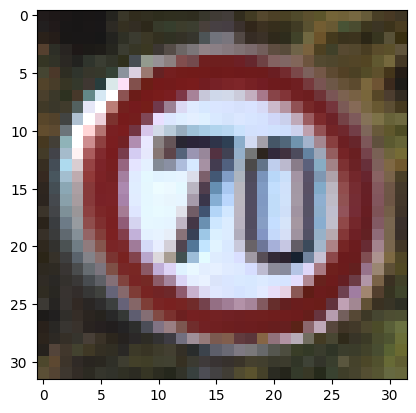

In [185]:
 plt.imshow(imagem)